<a href="https://www.kaggle.com/code/sanjanasatish68l/my-titanic-project?scriptVersionId=112869259" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
url = '/kaggle/input/titanic/train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
url = '/kaggle/input/titanic/test.csv'
df_test = pd.read_csv(url)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
url = '/kaggle/input/titanic/gender_submission.csv'
df_gender = pd.read_csv(url)
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
df2 = pd.concat([df_test.assign(ind="test"), df.assign(ind="train")])
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ind,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,train,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,train,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,train,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,train,1.0


In [6]:
df2.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
ind               0
Survived        418
dtype: int64

In [7]:
mean_val = df2['Age'].mean()
df2['Age'].fillna(value=mean_val, inplace=True)

In [8]:
df2 = df2.dropna(subset = ['Embarked'])


In [9]:
df2 = df2.drop(['Name','Ticket', 'Fare', 'Cabin'], axis=1)

In [10]:
df2['Adult/child'] = np.where(df2['Age']
                       <18,'child','adult')
df2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,ind,Survived,Adult/child
0,892,3,male,34.500000,0,0,Q,test,NaN,adult
1,893,3,female,47.000000,1,0,S,test,NaN,adult
2,894,2,male,62.000000,0,0,Q,test,NaN,adult
3,895,3,male,27.000000,0,0,S,test,NaN,adult
4,896,3,female,22.000000,1,1,S,test,NaN,adult
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,S,train,0.0,adult
887,888,1,female,19.000000,0,0,S,train,1.0,adult
888,889,3,female,29.881138,1,2,S,train,0.0,adult
889,890,1,male,26.000000,0,0,C,train,1.0,adult


In [11]:
df_test, df_train = df2[df2["ind"].eq("test")], df2[df2["ind"].eq("train")]

In [12]:
x_train = df_train.drop(columns = 'Survived')
y_train= df_train['Survived']
x_test = df_test.drop(columns = 'Survived')

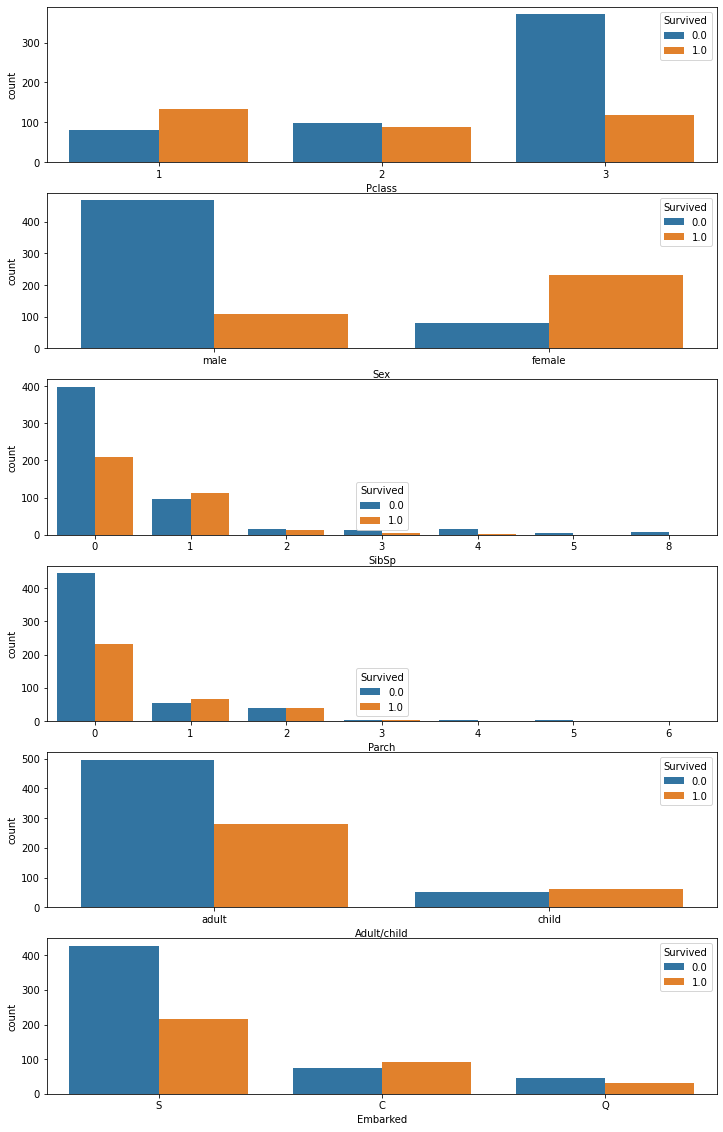

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Pclass', 'Sex', 'SibSp','Parch', 'Adult/child', 'Embarked']


fig=plt.figure(figsize=(12,20))
for i, var in enumerate(features):
    ax=fig.add_subplot(6,1,i+1)
    sns.countplot(data=df_train, x=var, axes=ax, hue='Survived')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
features = ["Sex","Pclass","SibSp","Parch", "Adult/child", "Embarked"]
train_x = pd.get_dummies(x_train[features])
test_x= pd.get_dummies(x_test[features])
clf = RandomForestClassifier( n_estimators=20, max_depth=5)
classif = clf.fit(train_x, y_train)
pred = classif.predict(test_x)
score = cross_val_score(clf, test_x, pred)
print('Cross validation score',score)
pred = pred.astype(int)

Cross validation score [0.96428571 0.96428571 0.97619048 0.97590361 0.93975904]


In [15]:
display(pred)
output = pd.DataFrame({'PassengerId': x_test.PassengerId, 'Survived': pred})
output

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [16]:
output.to_csv('submission.csv', index=False)